In [1]:
# 1: Importação de bibliotecas e configuração inicial do projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Markdown, display  # Para caixas de insight em Markdown

# Suprime mensagens de aviso (warnings) do Python/Bibliotecas

warnings.filterwarnings('ignore')

# Configurações visuais globais

plt.style.use('seaborn-v0_8')      # Estilo elegante e profissional
sns.set_palette('muted')           # Paleta de cores suave e acessível

%matplotlib inline                 
# Linha acima exibe gráficos diretamente no notebook

# Biblioteca externa para gráfico 

from adjustText import adjust_text

# Importa funções para renderizar texto formatado (Markdown) e HTML nos outputs do notebook.

from IPython.display import Markdown, display 

# Confirmação de setup concluído

print("✓ Bibliotecas importadas e ambiente configurado com sucesso.")
print("  Pronto para carregar e explorar o dataset do Top 2000 séries.")

✓ Bibliotecas importadas e ambiente configurado com sucesso.
  Pronto para carregar e explorar o dataset do Top 2000 séries.


In [2]:
# 2: Leitura do dataset e visão geral inicial
# Tabela: 1

df = pd.read_csv('top_rated_2000webseries.csv')

# Informações básicas

print("Formato do dataset:", df.shape)

print(f"Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")

# Primeiras linhas para inspeção visual

df.head()

Formato do dataset: (2000, 11)
Dataset carregado com sucesso!
Dimensões: 2,000 linhas × 11 colunas


,id,title,original_title,overview,premiere_date,popularity,genre,country_origin,original_language,rating,votes
0,1,Breaking Bad,Breaking Bad,"Walter White, a New Mexico chemistry teacher, ...",2008-01-20,108.7820,"Drama, Crime",United States,English,8.900,16556
1,2,Avatar: The Last Airbender,Avatar: The Last Airbender,"In a war-torn world of elemental magic, a youn...",2005-02-21,12.5347,"Animation, Action & Adventure, Sci-Fi & Fantasy",United States,English,8.800,4557
2,3,Arcane,Arcane,Amid the stark discord of twin cities Piltover...,2021-11-06,22.5739,"Animation, Sci-Fi & Fantasy, Drama, Action & A...",United States,English,8.800,5481
3,4,When Life Gives You Tangerines,폭싹 속았수다,"In Jeju, a spirited girl and a steadfast boy's...",2025-03-07,18.5771,Drama,South Korea,Korean,8.751,423
4,5,Frieren: Beyond Journey's End,葬送のフリーレン,Decades after her party defeated the Demon Kin...,2023-09-29,28.3761,"Animation, Action & Adventure, Drama, Sci-Fi &...",Japan,Japanese,8.735,565


In [3]:
# 3: Renomeando colunas para português

df.rename(columns={
    'id': 'id',
    'title': 'título',
    'original_title': 'título_original',
    'overview': 'sinopse',
    'premiere_date': 'data_estreia',
    'popularity': 'popularidade',
    'genre': 'gêneros',
    'country_origin': 'país',
    'original_language': 'idioma_original',
    'rating': 'nota_média',
    'votes': 'total_votos'
}, inplace=True)

print("Colunas renomeadas com sucesso!")
print(df.columns.tolist())

Colunas renomeadas com sucesso!
['id', 'título', 'título_original', 'sinopse', 'data_estreia', 'popularidade', 'gêneros', 'país', 'idioma_original', 'nota_média', 'total_votos']


In [4]:
# 4: Estatísticas descritivas completas
# Tabela: 2

print("- Estatísticas Descritivas\n")

# Colunas numéricas como float (ponto decimal)

df['nota_média'] = df['nota_média'].astype(float)
df['popularidade'] = df['popularidade'].astype(float)
df['total_votos'] = df['total_votos'].astype(int)

# Estatísticas gerais das colunas numéricas

print("Estatísticas descritivas das variáveis numéricas\n")
display(df.describe().round(2).T)

# Estatísticas complementares

print("\n- Estatísticas Detalhadas\n")

print(f"Total de séries: {len(df):,}")
print(f"Nota média geral: {df['nota_média'].mean():.3f}")
print(f"Mediana da nota: {df['nota_média'].median():.3f}")
print(f"Série com mais votos: {df.loc[df['total_votos'].idxmax(), 'título']} → {df['total_votos'].max():,} votos")
print(f"Nota mais alta: {df['nota_média'].max():.2f} → {df[df['nota_média'] == df['nota_média'].max()]['título'].tolist()}")
print(f"Nota mais baixa no Top 2000: {df['nota_média'].min():.2f}")
print(f"Popularidade média: {df['popularidade'].mean():.1f}")

- Estatísticas Descritivas

Estatísticas descritivas das variáveis numéricas



,count,mean,std,min,25%,50%,75%,max
id,2000.0,1000.50,577.49,1.00,500.75,1000.50,1500.25,2000.00
popularidade,2000.0,13.56,18.45,0.39,4.82,8.25,15.18,338.25
nota_média,2000.0,7.85,0.41,7.09,7.50,7.82,8.20,8.90
total_votos,2000.0,1028.83,1781.44,200.00,291.75,490.00,990.00,25807.00



- Estatísticas Detalhadas

Total de séries: 2,000
Nota média geral: 7.851
Mediana da nota: 7.825
Série com mais votos: Game of Thrones → 25,807 votos
Nota mais alta: 8.90 → ['Breaking Bad']
Nota mais baixa no Top 2000: 7.09
Popularidade média: 13.6


In [5]:
# 5: Exploração do Dataset
# Tabela: 3 & 4

print("\nQuantidade de valores únicos por coluna (ordenado):\n")
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts.to_frame("Valores Únicos"))

print("\nValores ausentes por coluna:\n")
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)
missing_df = pd.DataFrame({
    'Ausentes': missing_counts,
    'Percentual (%)': missing_pct.map('{:.2f}%'.format)
}).sort_values('Ausentes', ascending=False)

# Colunas que têm pelo menos 1 valor ausente

missing_df = missing_df[missing_df['Ausentes'] > 0]
display(missing_df)


Quantidade de valores únicos por coluna (ordenado):



,Valores Únicos
id,2000
popularidade,1990
sinopse,1979
título_original,1966
título,1964
data_estreia,1713
total_votos,1033
nota_média,730
gêneros,483
país,66



Valores ausentes por coluna:



,Ausentes,Percentual (%)
sinopse,20,1.00%
país,1,0.05%


In [6]:
# 6: Limpeza e transformação de tipos de dados
# Tabela: 5

# Conversão e garantia de tipos numéricos
# 'Int64' (I maiúsculo) permite que colunas inteiras aceitem nulos (NaN).

df['nota_média'] = pd.to_numeric(df['nota_média'], errors='coerce')
df['popularidade'] = pd.to_numeric(df['popularidade'], errors='coerce')
df['total_votos'] = pd.to_numeric(df['total_votos'], errors='coerce').astype('Int64')

# Feature Engineering: Data de estreia → datetime + extração de ano/mês

df['data_estreia'] = pd.to_datetime(df['data_estreia'], errors='coerce')
df['ano_estreia'] = df['data_estreia'].dt.year.astype('Int64')
df['mês_estreia'] = df['data_estreia'].dt.month.astype('Int64')

# Tratamento dos valores ausentes (missings)
# Sinopse (Texto): Preenche com texto padrão (20 nulos).

df['sinopse'].fillna('Sinopse não disponível', inplace=True)

# País (Categórico): Imputação com 'Desconhecido' (1 nulo).

df['país'].fillna('Desconhecido', inplace=True)

# Conferência Final

print("\nTipos de Dados após Transformação:")
print(df.dtypes)
print(f"\nTotal de linhas após tratamento: {len(df):,}")

# Detalha onde estão os nulos restantes (apenas nas colunas de data/ano/mês)

nulos_restantes = df.isna().sum()
nulos_restantes = nulos_restantes[nulos_restantes > 0]

if nulos_restantes.empty:
    print("Zero valores missing restantes (dataset 100% limpo).")
else:
    print("\nValores missing restantes (apenas em colunas de Data, como esperado):")
    print(nulos_restantes)


Tipos de Dados após Transformação:
id                          int64
título                     object
título_original            object
sinopse                    object
data_estreia       datetime64[ns]
popularidade              float64
gêneros                    object
país                       object
idioma_original            object
nota_média                float64
total_votos                 Int64
ano_estreia                 Int64
mês_estreia                 Int64
dtype: object

Total de linhas após tratamento: 2,000
Zero valores missing restantes (dataset 100% limpo).


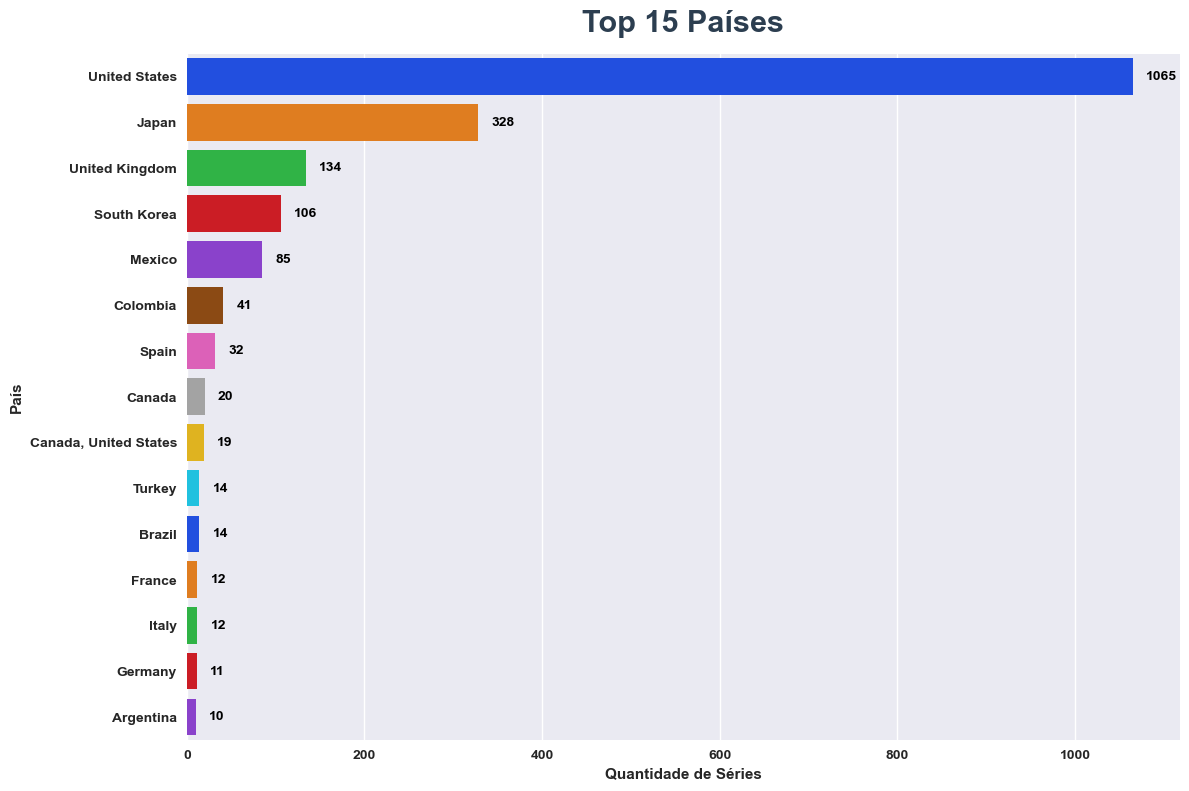


--- Principais Conclusões - Distribuição por País ---




Os **países dominantes** no Top 2000 são:
* **United States** com **1,065** séries.
* **Japan** com **328** séries.

---

Os **países na base** do Top 15 (menor representação) são:
* **Germany** com **11** séries.
* **Argentina** com **10** séries.

---

**ANÁLISE DE DISPERSÃO E DOMÍNIO:**
* **Domínio Absoluto:** A diferença entre o 1º e 2º colocado é de **737** séries, o que evidencia o claro domínio de **United States** sobre os demais rankings.
* **Empate Técnico:** A diferença de séries entre **Germany** e **Argentina** é de apenas **1** série(s). Essa pequena margem sugere um empate técnico na parte inferior do Top 15.
* **Dispersão Total:** A dispersão total é impressionante: **United States** tem **1,055** séries a mais que **Argentina**. Essa diferença mostra a alta concentração de produção em países específicos.

---

**AÇÃO ESTRATÉGICA:** Essas séries são importantes para a **percepção de valor** do assinante, mas a estratégia deve focar em **qualidade nichada** para competir com o domínio dos EUA.


In [7]:
# 7: Países mais presentes no Top 2000
# Gráfico: 1

# Preparação dos gráficos
top_paises = df['país'].value_counts().head(15)

# Criação do gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=top_paises.values, y=top_paises.index, palette='bright')
plt.title('Top 15 Países', fontsize=22, fontweight='bold', y=1.02, color='#2c3e50')
plt.xlabel('Quantidade de Séries', fontweight='bold')
plt.ylabel('País', fontweight='bold')

# Negrito nos ticks
plt.yticks(fontweight='bold') # Coloca os nomes das categorias (eixo Y) em negrito
plt.xticks(fontweight='bold') # Coloca os valores numéricos (eixo X) em negrito

# Adiciona valor nas barras
for i, v in enumerate(top_paises.values):
    plt.text(v + 15, i, str(v), color='black', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Análise Textual
print("\n--- Principais Conclusões - Distribuição por País ---\n")

# Identificação dos Top 2 e Últimos 2
primeiro_pais = top_paises.index[0]
primeira_contagem = top_paises.values[0]
segundo_pais = top_paises.index[1]
segunda_contagem = top_paises.values[1]

#  -1 para o último e -2 para o penúltimo, garantindo pegar o fim da lista
ultimo_pais = top_paises.index[-1]
ultima_contagem = top_paises.values[-1]
penultimo_pais = top_paises.index[-2]
penultima_contagem = top_paises.values[-2]

# Cálculo das Diferenças
diferenca_top2 = primeira_contagem - segunda_contagem
diferenca_last2 = penultima_contagem - ultima_contagem
diferenca_total = primeira_contagem - ultima_contagem

# Análise Textual
texto = f"""
Os **países dominantes** no Top 2000 são:
* **{primeiro_pais}** com **{primeira_contagem:,}** séries.
* **{segundo_pais}** com **{segunda_contagem:,}** séries.

---

Os **países na base** do Top 15 (menor representação) são:
* **{penultimo_pais}** com **{penultima_contagem}** séries.
* **{ultimo_pais}** com **{ultima_contagem}** séries.

---

**ANÁLISE DE DISPERSÃO E DOMÍNIO:**
* **Domínio Absoluto:** A diferença entre o 1º e 2º colocado é de **{diferenca_top2:,}** séries, o que evidencia o claro domínio de **{primeiro_pais}** sobre os demais rankings.
* **Empate Técnico:** A diferença de séries entre **Germany** e **Argentina** é de apenas **1** série(s). Essa pequena margem sugere um empate técnico na parte inferior do Top 15.
* **Dispersão Total:** A dispersão total é impressionante: **United States** tem **1,055** séries a mais que **Argentina**. Essa diferença mostra a alta concentração de produção em países específicos.

---

**AÇÃO ESTRATÉGICA:** Essas séries são importantes para a **percepção de valor** do assinante, mas a estratégia deve focar em **qualidade nichada** para competir com o domínio dos EUA.
"""

display(Markdown(texto))

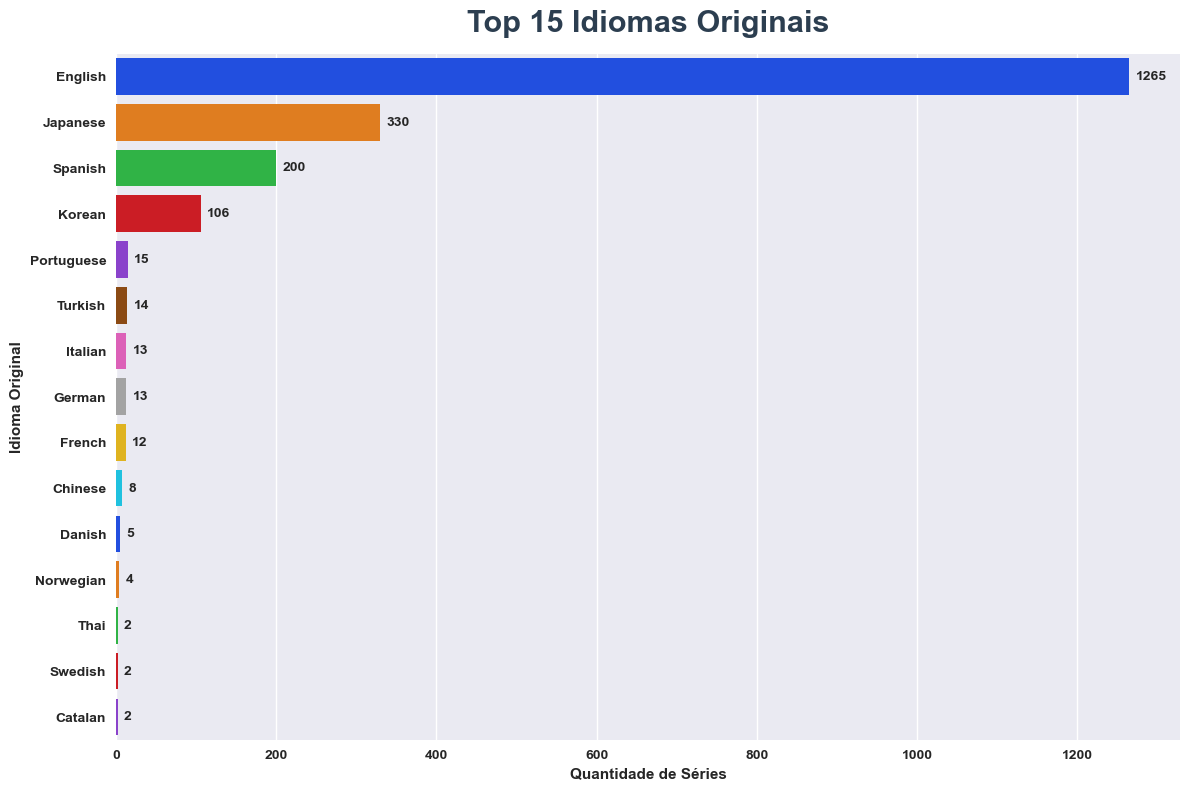


--- Principais Conclusões - Distribuição por Idioma Original ---




**RESUMO DE REPRESENTAÇÃO POR IDIOMA**

Os **idiomas mais dominantes** no Top 2000 são:
* **English** com **1,265** séries.
* **Japanese** com **330** séries.

---

Os **idiomas na base** do Top 15 (com menor representação) são:
* **Swedish** com **2** séries.
* **Catalan** com **2** séries.

---

**CONCLUSÃO ESTRATÉGICA:**
* **Domínio:** **English** domina com uma margem de **935** séries sobre o **Japanese**.
* **Hegemonia:** Essa diferença massiva mostra a clara hegemonia da língua inglesa no conteúdo de séries de alto ranking.
* **Oportunidade de Nicho:** O fato de outros idiomas terem pouca representação sugere uma oportunidade para plataformas que desejam se diferenciar com conteúdo de nicho e alta qualidade em outras línguas (K-Dramas, etc.).


In [8]:
# 8: Distribuição por Idioma Original
# Gráfico: 2

# Preparação dos dados

top_idiomas = df['idioma_original'].value_counts().head(15)

# Criação do gráfico

plt.figure(figsize=(12, 8))
# Usando a paleta 'bright' como você solicitou.
ax = sns.barplot(x=top_idiomas.values, y=top_idiomas.index, palette='bright')

plt.title('Top 15 Idiomas Originais', fontsize=22, fontweight='bold', y=1.02, color='#2c3e50')
plt.xlabel('Quantidade de Séries', fontweight='bold')
plt.ylabel('Idioma Original', fontweight='bold')

# Negrito nos ticks

plt.yticks(fontweight='bold') # Coloca os nomes das categorias (eixo Y) em negrito
plt.xticks(fontweight='bold') # Coloca os valores numéricos (eixo X) em negrito

# Adiciona as contagens nas barras

for i, v in enumerate(top_idiomas.values):
    # A cor do texto nas barras pode ser ajustada para vermelho para o N° 1
    plt.text(v + 8, i, str(v), va='center', fontweight='bold')

# Destaque no eixo y (Idioma)
# Captura os rótulos de texto no eixo Y (os nomes dos idiomas)

ylabels = ax.get_yticklabels()

# Definir o rótulo do primeiro idioma (índice 0)

if ylabels: # Garante que há rótulos para trabalhar
    ylabels[0].set_fontweight('bold')

# Aplica os rótulos de volta ao eixo

ax.set_yticklabels(ylabels)

plt.tight_layout()
plt.show()

# Análise Textual

print("\n--- Principais Conclusões - Distribuição por Idioma Original ---\n")

# Reutiliza os dados calculados
primeiro_idioma = top_idiomas.index[0]
primeira_contagem = top_idiomas.values[0]
segundo_idioma = top_idiomas.index[1]
segunda_contagem = top_idiomas.values[1]
ultimo_idioma = top_idiomas.index[-1]
ultima_contagem = top_idiomas.values[-1]
penultimo_idioma = top_idiomas.index[-2]
penultima_contagem = top_idiomas.values[-2]

# --- Cálculo das Diferenças (MANTIDO) ---
diferenca_top2 = primeira_contagem - segunda_contagem

texto = f"""
**RESUMO DE REPRESENTAÇÃO POR IDIOMA**

Os **idiomas mais dominantes** no Top 2000 são:
* **{primeiro_idioma}** com **{primeira_contagem:,}** séries.
* **{segundo_idioma}** com **{segunda_contagem:,}** séries.

---

Os **idiomas na base** do Top 15 (com menor representação) são:
* **{penultimo_idioma}** com **{penultima_contagem}** séries.
* **{ultimo_idioma}** com **{ultima_contagem}** séries.

---

**CONCLUSÃO ESTRATÉGICA:**
* **Domínio:** **{primeiro_idioma}** domina com uma margem de **{diferenca_top2:,}** séries sobre o **{segundo_idioma}**.
* **Hegemonia:** Essa diferença massiva mostra a clara hegemonia da língua inglesa no conteúdo de séries de alto ranking.
* **Oportunidade de Nicho:** O fato de outros idiomas terem pouca representação sugere uma oportunidade para plataformas que desejam se diferenciar com conteúdo de nicho e alta qualidade em outras línguas (K-Dramas, etc.).
"""

display(Markdown(texto))

,título,nota_média,total_votos,ano_estreia,país,idioma_original,gêneros
1,Breaking Bad,8.900,"16,556",2008,United States,English,"Drama, Crime"
2,Arcane,8.800,"5,481",2021,United States,English,"Animation, Sci-Fi & Fantasy, Drama, Action & Adventure"
3,Avatar: The Last Airbender,8.800,"4,557",2005,United States,English,"Animation, Action & Adventure, Sci-Fi & Fantasy"
4,Frieren: Beyond Journey's End,8.735,565,2023,Japan,Japanese,"Animation, Action & Adventure, Drama, Sci-Fi & Fantasy"
5,The Owl House,8.700,"1,728",2020,United States,English,"Animation, Sci-Fi & Fantasy, Drama, Action & Adventure, Comedy, Kids"
6,One Piece,8.700,"5,043",1999,Japan,Japanese,"Action & Adventure, Comedy, Animation"
7,Fullmetal Alchemist: Brotherhood,8.700,"2,291",2009,Japan,Japanese,"Animation, Action & Adventure, Sci-Fi & Fantasy, Comedy"
8,The Chosen,8.700,689,2019,United States,English,"Drama, Family, Action & Adventure"
9,Attack on Titan,8.700,"7,084",2013,Japan,Japanese,"Animation, Sci-Fi & Fantasy, Action & Adventure"
10,Anne with an E,8.700,"4,832",2017,Canada,English,"Drama, Family"


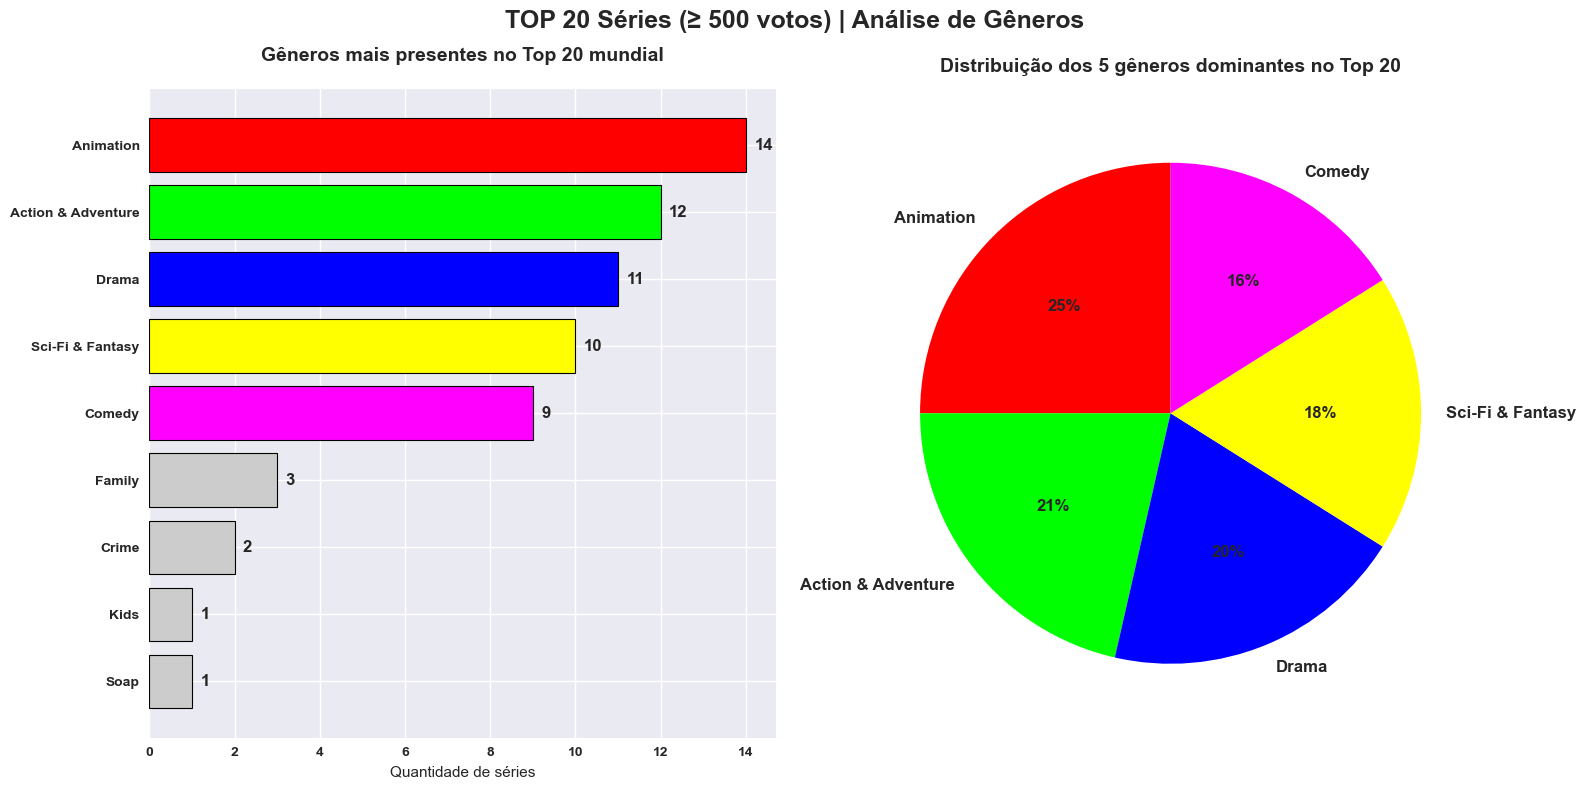


**RESUMO DO TOP 20 MUNDIAL (Qualidade vs. Gênero)**

**VISÕES DIRETAS:**
* Gênero absoluto: **Animation** (14 séries)
* Percentual de Animação: **14** séries → **70%** do pódio!
* Países no pódio: **4** únicos → Top 3: **{'United States': 11, 'Japan': 7, 'Canada': 1}**
* Séries não-inglês no Top 20: **8** séries

---

**VISÃO DE MERCADO - PADRÕES DE SUCESSO E RENTABILIDADE:**
* **Domínio de Categoria:** O gênero **Animation** é o líder absoluto de presença no Top 20 mundial, aparecendo em **14** das 20 melhores produções.

* **Competitividade e Proximidade (Quadrante de Ouro):** Observamos uma distância curta entre os quatro pilares do ranking:
    * A distância entre o 1º (**Animation**) e o 2º (**Action & Adventure**) é de apenas **2** unidade(s).
    * A distância total do 1º ao 4º colocado (**Sci-Fi & Fantasy**) é de apenas **4** unidade(s).
    * Isso indica que **Animation**, **Action & Adventure**, **Drama** e **Sci-Fi & Fantasy** formam o 'quadrante de ouro' do entretenimento.
    
* **Recomendação para Produtoras:** Para empresas que buscam maximizar a **rentabilidade** e aceitação pelo público global, o investimento em produções que mesclam esses quatro gêneros dominantes parece ser o caminho mais seguro e validado pelos dados históricos do Top 2000.


In [9]:
# 9: Top 20 Mundial + Análise de Gêneros
# Tabela: 6

# Filtro, Ordenação e Cópia
min_votos = 500
top_20 = df[df['total_votos'] >= min_votos].sort_values('nota_média', ascending=False).head(20).copy()

# Definição das Cores
cores_fortes_top5 = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF']
cor_neutra_barras = '#cccccc'

# Tabela principal
display_cols = ['título', 'nota_média', 'total_votos', 'ano_estreia', 'país', 'idioma_original', 'gêneros']
top_20_styled = top_20[display_cols].reset_index(drop=True)
top_20_styled.index += 1

display(top_20_styled.style
    .format({'nota_média': '{:.3f}', 'total_votos': '{:,}'})
    .bar(subset=['nota_média'], color='#4CAF50', width=80)
    .bar(subset=['total_votos'], color='#FF5722', width=70)
    .set_properties(**{'font-weight': 'bold'}, subset=['título']))

# Análise de Gêneros (Explode + Gráficos)
generos_exploded = top_20['gêneros'].str.split(', ').explode()
contagem = generos_exploded.value_counts() # Variável correta: contagem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Lógica de Cores para o Gráfico de Barras
num_generos = len(contagem)
num_destaque = len(cores_fortes_top5) 
cores_neutras = [cor_neutra_barras] * (num_generos - num_destaque)

# Invertendo a lista de cores
cores_destaque_invertida = cores_fortes_top5[::-1] 
paleta_barras = cores_neutras + cores_destaque_invertida 

# Configuração do Título Geral
titulo_geral = f"TOP 20 Séries (≥ {min_votos:,} votos) | Análise de Gêneros"
fig.suptitle(titulo_geral, fontsize=18, fontweight='bold') 

# Gráfico de barras horizontal
ax1.barh(contagem.index[::-1], contagem.values[::-1], color=paleta_barras, edgecolor='black', linewidth=0.8)
ax1.set_title('Gêneros mais presentes no Top 20 mundial', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Quantidade de séries')

# Implementação do negrito nos rótulos (ticks)
# Eixo Y (Rótulos dos Gêneros)
plt.setp(ax1.get_yticklabels(), fontweight='bold')

# Eixo X (Rótulos dos Valores Numéricos)
plt.setp(ax1.get_xticklabels(), fontweight='bold')

for i, v in enumerate(contagem.values[::-1]):
    ax1.text(v + 0.2, i, str(v), va='center', fontweight='bold', fontsize=12)

# Gráfico de Pizza com os top 5
top5 = contagem.head(5)
ax2.pie(top5.values, labels=top5.index, autopct='%1.0f%%', startangle=90, colors=cores_fortes_top5, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Distribuição dos 5 gêneros dominantes no Top 20', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Visões Diretas e Análise Textual (Corrigido e Formatado em Markdown)

# Extração de Dados dos Líderes (USANDO 'contagem')
top_1_gen = contagem.index[0]
top_2_gen = contagem.index[1]
top_3_gen = contagem.index[2]
top_4_gen = contagem.index[3]

# Cálculos de Distância (USANDO 'contagem')
gap_1_2 = contagem.values[0] - contagem.values[1]
gap_1_4 = contagem.values[0] - contagem.values[3]

# Visão Estratégica
texto = f"""
**RESUMO DO TOP 20 MUNDIAL (Qualidade vs. Gênero)**

**VISÕES DIRETAS:**
* Gênero absoluto: **{contagem.index[0]}** ({contagem.iloc[0]} séries)
* Percentual de Animação: **{contagem.get('Animation', 0)}** séries → **{(contagem.get('Animation', 0)/20*100):.0f}%** do pódio!
* Países no pódio: **{top_20['país'].nunique()}** únicos → Top 3: **{top_20['país'].value_counts().head(3).to_dict()}**
* Séries não-inglês no Top 20: **{len(top_20[top_20['idioma_original'] != 'English'])}** séries

---

**VISÃO DE MERCADO - PADRÕES DE SUCESSO E RENTABILIDADE:**
* **Domínio de Categoria:** O gênero **{top_1_gen}** é o líder absoluto de presença no Top 20 mundial, aparecendo em **{contagem.values[0]}** das 20 melhores produções.

* **Competitividade e Proximidade (Quadrante de Ouro):** Observamos uma distância curta entre os quatro pilares do ranking:
    * A distância entre o 1º (**{top_1_gen}**) e o 2º (**{top_2_gen}**) é de apenas **{gap_1_2}** unidade(s).
    * A distância total do 1º ao 4º colocado (**{top_4_gen}**) é de apenas **{gap_1_4}** unidade(s).
    * Isso indica que **{top_1_gen}**, **{top_2_gen}**, **{top_3_gen}** e **{top_4_gen}** formam o 'quadrante de ouro' do entretenimento.
    
* **Recomendação para Produtoras:** Para empresas que buscam maximizar a **rentabilidade** e aceitação pelo público global, o investimento em produções que mesclam esses quatro gêneros dominantes parece ser o caminho mais seguro e validado pelos dados históricos do Top 2000.
"""

display(Markdown(texto))

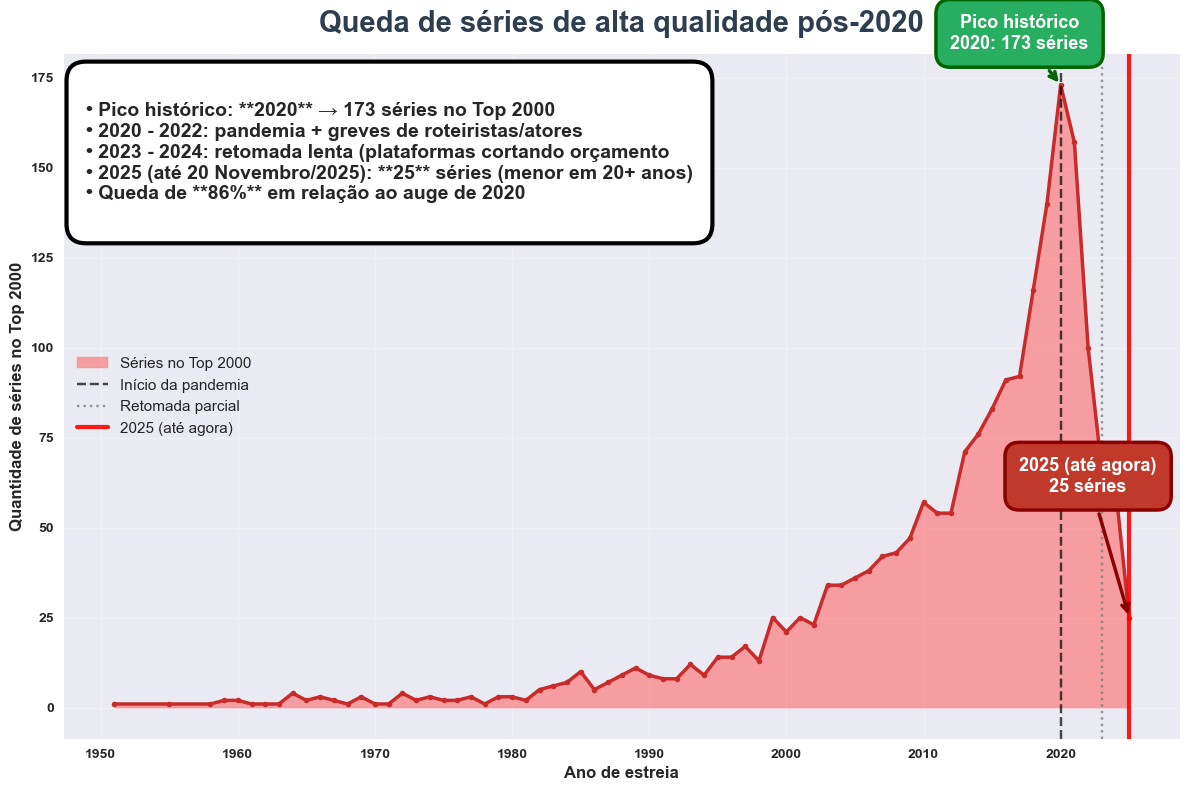

In [10]:
# 10: Evolução por ano de estreia + Destaques Visuais

plt.figure(figsize=(12, 8))

# Contagem por ano
ano_count = df['ano_estreia'].value_counts().sort_index()
anos = ano_count.index
valores = ano_count.values

# Gráfico de linha + área preenchida
plt.fill_between(anos, valores, color='#ff6b6b', alpha=0.6, label='Séries no Top 2000')
plt.plot(anos, valores, color='#c92a2a', linewidth=2.5, marker='o', markersize=4)

# Linhas de referência importantes
plt.axvline(2020, color='black', linestyle='--', alpha=0.7, label='Início da pandemia')
plt.axvline(2023, color='gray', linestyle=':', alpha=0.8, label='Retomada parcial')
plt.axvline(2025, color='red', linestyle='-', alpha=0.9, linewidth=3, label='2025 (até agora)')

plt.title('Queda de séries de alta qualidade pós-2020', fontsize=21, fontweight='bold', y=1.02, color='#2c3e50')
plt.xlabel('Ano de estreia', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de séries no Top 2000', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Negrito nos ticks

plt.yticks(fontweight='bold') # Coloca os nomes das categorias (eixo Y) em negrito
plt.xticks(fontweight='bold') # Coloca os valores numéricos (eixo X) em negrito

# Análise de Dados e Variáveis de Destaque  
pico_ano = ano_count.idxmax()
pico_valor = ano_count.max()
fundo_2025 = ano_count.get(2025, 0) # Usa .get(2025, 0) para garantir que 2025 exista
queda_percentual = ((pico_valor - fundo_2025) / pico_valor * 100)


# Anotação do Pico - Caixa Verde
plt.annotate(f'Pico histórico\n{pico_ano}: {pico_valor} séries',
             xy=(pico_ano, pico_valor), 
             xytext=(pico_ano-3, pico_valor+10),
             arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2.5),
             fontsize=13, fontweight='bold', color='white', ha='center',
             bbox=dict(facecolor='#27ae60', edgecolor='darkgreen', boxstyle='round,pad=0.8', lw=2.5))

# Anotação de 2025 - Caixa Vermelha
plt.annotate(f'2025 (até agora)\n{fundo_2025} séries',
             xy=(2025, fundo_2025), 
             xytext=(2022, fundo_2025 + 35),
             arrowprops=dict(arrowstyle='->', color='darkred', lw=2.5),
             fontsize=13, fontweight='bold', color='white', ha='center',
             bbox=dict(facecolor='#c0392b', edgecolor='darkred', boxstyle='round,pad=0.8', lw=2.5))


# Visão Estratégica
insight_text = f"""
• Pico histórico: **{pico_ano}** → {pico_valor} séries no Top 2000
• 2020 - 2022: pandemia + greves de roteiristas/atores
• 2023 - 2024: retomada lenta (plataformas cortando orçamento
• 2025 (até 20 Novembro/2025): **{fundo_2025}** séries (menor em 20+ anos)
• Queda de **{queda_percentual:.0f}%** em relação ao auge de 2020
"""

bbox_props = dict(boxstyle="round,pad=1", facecolor="white", edgecolor="black", linewidth=3)
plt.text(0.02, 0.96, insight_text, transform=plt.gca().transAxes, fontsize=14,
         fontweight='bold', verticalalignment='top', bbox=bbox_props)

plt.tight_layout()
plt.show()

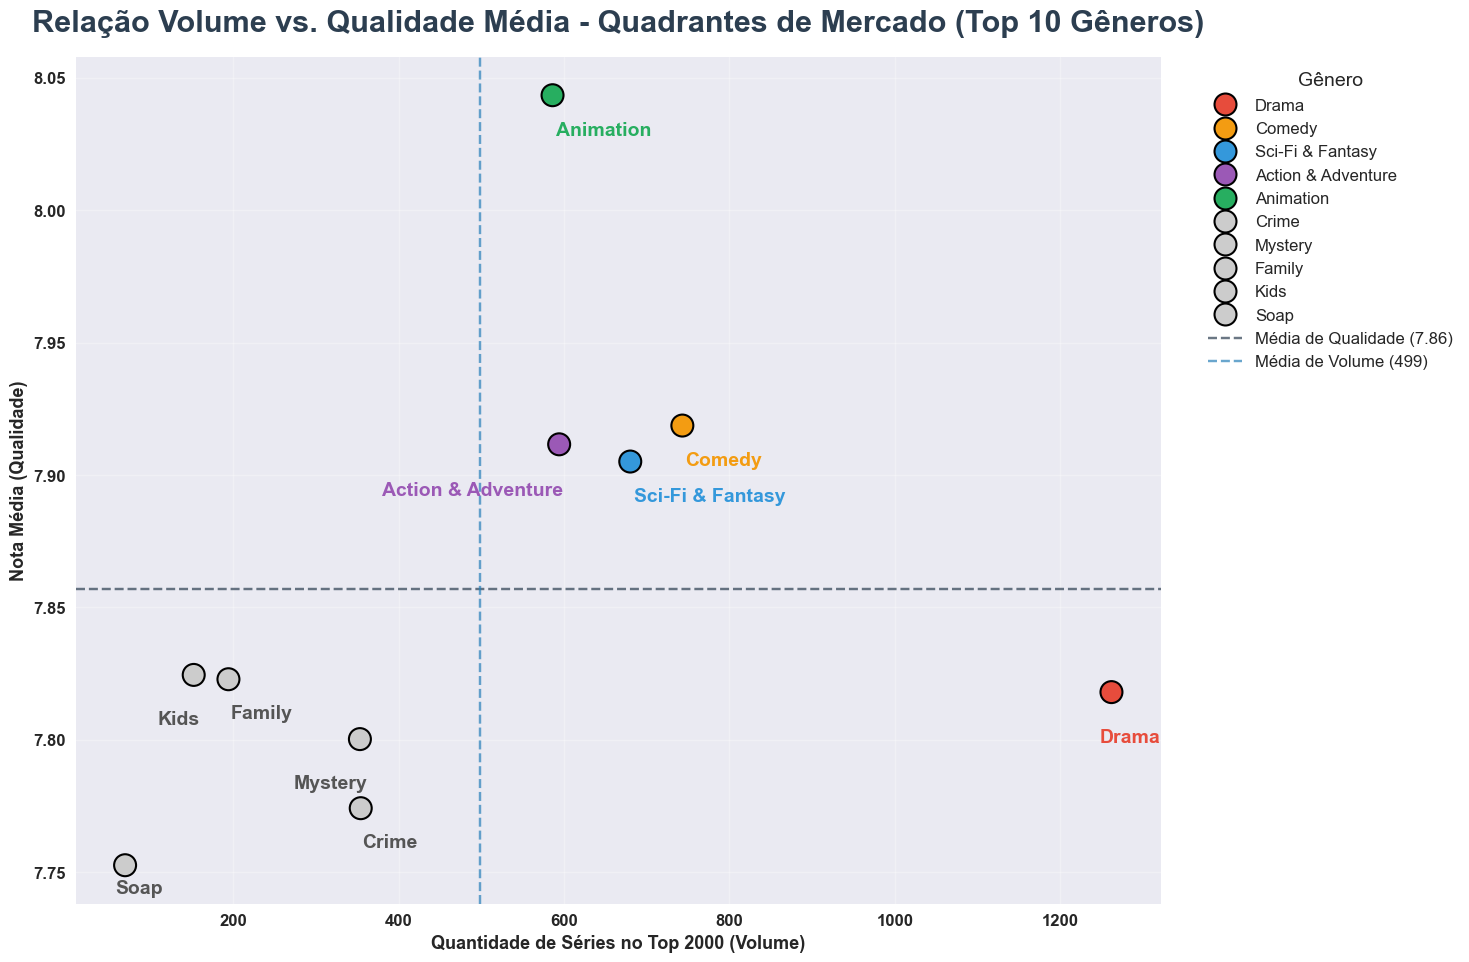


**RESUMO DO MERCADO: VOLUME VS. QUALIDADE (TOP 10 GÊNEROS)**

**ANÁLISE DE EXTREMOS:**
* **Volume Absoluto:** **Drama** é o líder em volume, com **1,262** séries, mas sua nota média é de **7.818**.
* **Qualidade Absoluta (Outlier):** **Animation** lidera em qualidade com **8.043** de nota média, sendo o único gênero acima de 8.0 no Top 10.

---

**QUADRANTES ESTRATÉGICOS:**

* **Alto Volume / Baixa Qualidade (Saturação):**
    * **Drama** claramente domina este quadrante, demonstrando a **relação inversa** entre volume e qualidade no Top 2000.
* **Alto Volume / Alta Qualidade (Sucesso Consolidado):**
    * **Comedy** e **Sci-Fi & Fantasy** se posicionam como gêneros de alto volume e qualidade acima da média.
* **Baixo Volume / Alta Qualidade (Oportunidade de Nicho):**
    * Gêneros como **Kids** (7.824) e **Family** (7.823) mostram qualidade elevada, apesar do baixo volume.
* **Baixo Volume / Baixa Qualidade (Evitar):**
    * **Soap** (7.753) tem a menor nota média e volume, nicho menos valorizado no Top 2000.



In [11]:
# 11: Top 10 gêneros: Quantidade vs. Qualidade

# Explodir os gêneros (cria uma Series com índice duplicado)
generos_exploded = df['gêneros'].str.split(', ').explode()

# Cria o DataFrame unindo a Series com o DataFrame original,
# mas usando a Series anterior como base, e buscando apenas as colunas necessárias
df_generos_exploded = pd.DataFrame(generos_exploded).rename(columns={'gêneros': 'Gênero'})

# Adiciona nota_média ao novo DataFrame, alinhando pelo índice
df_generos_exploded = df_generos_exploded.join(df['nota_média']) 

# Calcular a Quantidade e filtrar os 10 mais comuns
top10_qtd = df_generos_exploded['Gênero'].value_counts().head(10)
generos_top10 = top10_qtd.index.tolist()

# Calcular a Nota Média apenas para os Top 10 Gêneros
media_genero = df_generos_exploded[df_generos_exploded['Gênero'].isin(generos_top10)] \
    .groupby('Gênero')['nota_média'].mean() \
    .reindex(generos_top10) # Reordena para casar com a ordem de volume

# Consolidação dos Dados (Adaptação)
# Garante DataFrame com coluna 'Gênero'
df_combinado = pd.DataFrame({
    'Quantidade': top10_qtd,
    'Nota_Média': media_genero
}).reset_index(names=['Gênero'])


# Paleta de cores (Mantido)
cores_fortes_top5 = ['#e74c3c', '#f39c12', '#3498db', '#9b59b6', '#27ae60']
cores_neutras_restantes = ['#cccccc'] * (len(df_combinado) - len(cores_fortes_top5))
cores_mapeadas = cores_fortes_top5 + cores_neutras_restantes

# Ordenação e Mapeamento (Mantido)
generos_em_ordem = df_combinado['Gênero'].tolist()
cor_map = {'Drama': '#e74c3c', 'Comedy': '#f39c12', 'Sci-Fi & Fantasy': '#3498db', 'Action & Adventure': '#9b59b6', 'Animation': '#27ae60'}
cores_mapeadas = [cor_map.get(g, '#cccccc') for g in generos_em_ordem]

# Plotagem do Gráfico de Dispersão 
plt.figure(figsize=(14, 11))

# Gráfico base (tamanho fixo s=250 para melhor visibilidade)
ax = sns.scatterplot(data=df_combinado, x='Quantidade', y='Nota_Média',
                hue='Gênero', edgecolor='black', linewidth=1.5, s=250,
                palette=cores_mapeadas, hue_order=generos_em_ordem)

# Linhas de Referência
media_qualidade = df_combinado['Nota_Média'].mean()
ax.axhline(media_qualidade, color='#2c3e50', linestyle='--', alpha=0.7, label=f'Média de Qualidade ({media_qualidade:.2f})')
media_volume = df_combinado['Quantidade'].mean()
ax.axvline(media_volume, color='#2980b9', linestyle='--', alpha=0.7, label=f'Média de Volume ({media_volume:.0f})')

# Novos Rótulos
texts = []
# Itera sobre cada ponto para criar o texto correspondente
for i, row in df_combinado.iterrows():
    genre_name = row['Gênero']
    # Pega a cor correta do dicionário ou usa preto como fallback
    label_color = cor_map.get(genre_name, '#555555')

    # Cria o objeto de texto, usando a mesma cor da bolinha para facilitar a leitura
    t = ax.text(row['Quantidade'], row['Nota_Média'] - 0.013, genre_name,
                ha='center', va='top', fontsize=14, fontweight='bold',
                color=label_color)
    texts.append(t)

# Ajustando a posição dos textos para evitar sobreposição
adjust_text(texts, arrowprops=dict())
# Se você tiver a biblioteca adjustText instalada, mantenha.

# Configurações Finais
plt.title('Relação Volume vs. Qualidade Média - Quadrantes de Mercado (Top 10 Gêneros)', fontsize=22, fontweight='bold', y=1.02, color='#2c3e50')
plt.xlabel('Quantidade de Séries no Top 2000 (Volume)', fontsize=13, fontweight='bold')
plt.ylabel('Nota Média (Qualidade)', fontsize=13, fontweight='bold')

# Negrito nos ticks (rótulos)
plt.setp(ax.get_yticklabels(), fontweight='bold')
plt.setp(ax.get_xticklabels(), fontweight='bold')

# Legenda fora do gráfico
ax.tick_params(axis='both', labelsize=12)
ax.legend(title='Gênero', bbox_to_anchor=(1.03, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Visão Estratégica
texto = f"""
**RESUMO DO MERCADO: VOLUME VS. QUALIDADE (TOP 10 GÊNEROS)**

**ANÁLISE DE EXTREMOS:**
* **Volume Absoluto:** **Drama** é o líder em volume, com **{top10_qtd.loc['Drama']:,}** séries, mas sua nota média é de **{media_genero.loc['Drama']:.3f}**.
* **Qualidade Absoluta (Outlier):** **Animation** lidera em qualidade com **{media_genero.loc['Animation']:.3f}** de nota média, sendo o único gênero acima de 8.0 no Top 10.

---

**QUADRANTES ESTRATÉGICOS:**

* **Alto Volume / Baixa Qualidade (Saturação):**
    * **Drama** claramente domina este quadrante, demonstrando a **relação inversa** entre volume e qualidade no Top 2000.
* **Alto Volume / Alta Qualidade (Sucesso Consolidado):**
    * **Comedy** e **Sci-Fi & Fantasy** se posicionam como gêneros de alto volume e qualidade acima da média.
* **Baixo Volume / Alta Qualidade (Oportunidade de Nicho):**
    * Gêneros como **Kids** ({media_genero.loc['Kids']:.3f}) e **Family** ({media_genero.loc['Family']:.3f}) mostram qualidade elevada, apesar do baixo volume.
* **Baixo Volume / Baixa Qualidade (Evitar):**
    * **Soap** ({media_genero.loc['Soap']:.3f}) tem a menor nota média e volume, nicho menos valorizado no Top 2000.
"""

display(Markdown(texto))

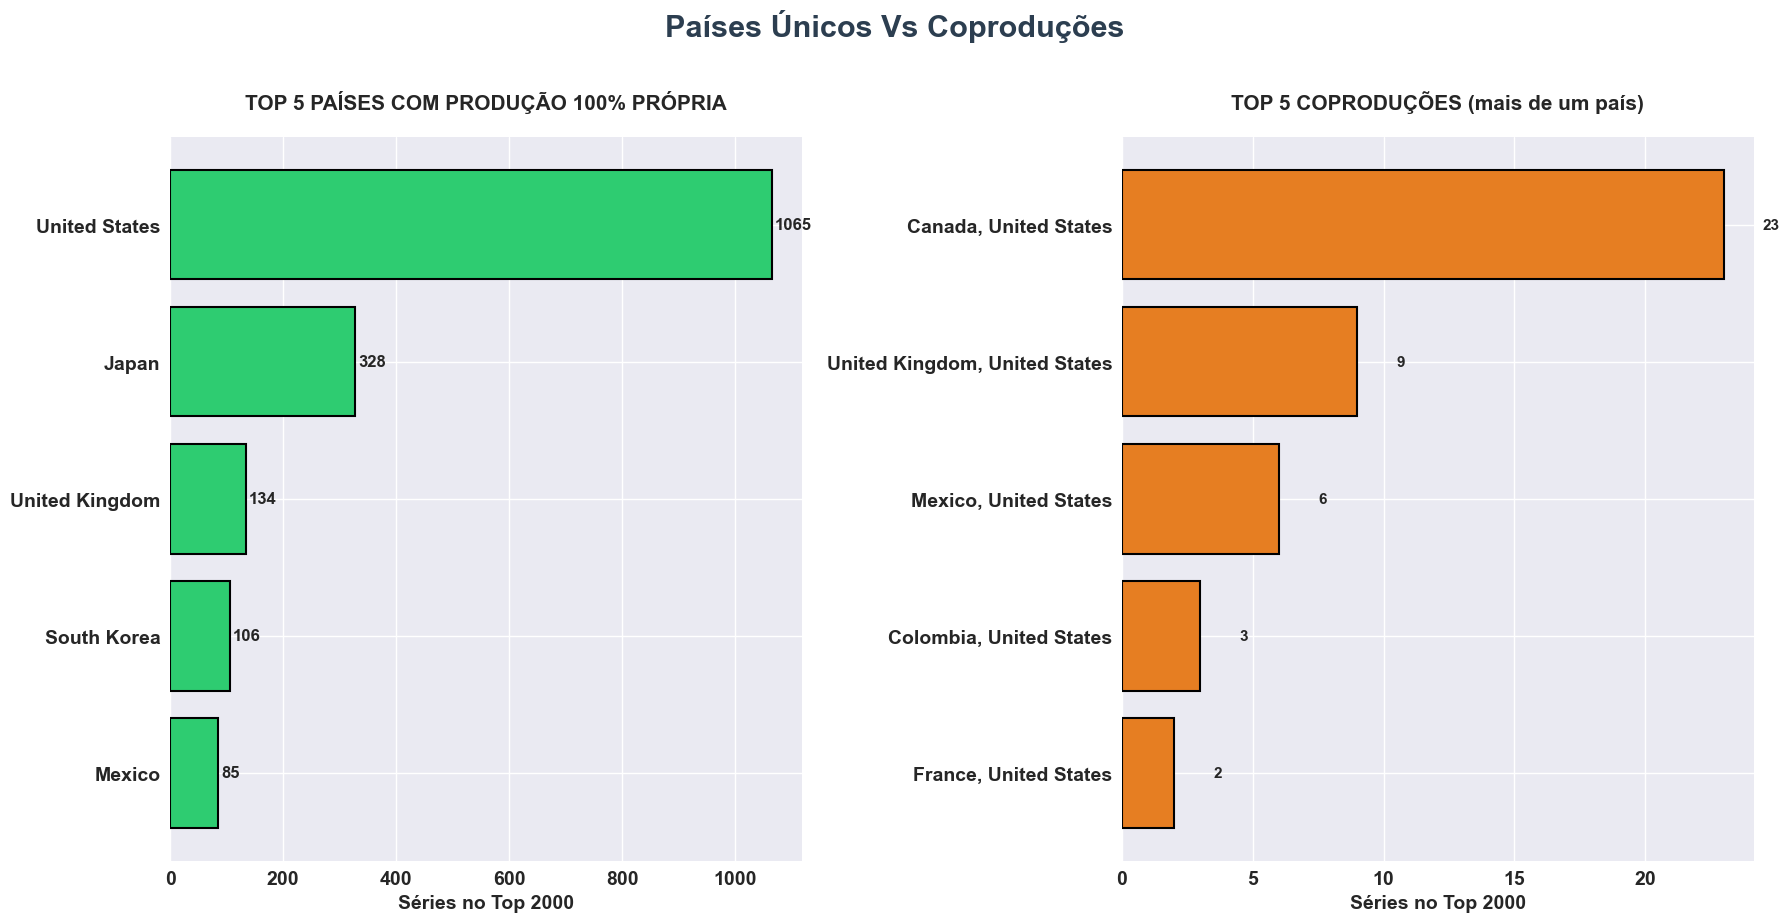


**RESUMO FINAL DOS PAÍSES E COPRODUÇÕES**

**TOP 5 PAÍSES ÚNICOS (produção 100% nacional):**  
1. **United States** → Mais de 1000 séries (Hollywood domina)  
2. **Japan** → Mais de 300 séries (animações nacionais destacam) 
4. **United Kingdom** → Mais de 130 séries  
3. **South Korea** → Pouco mais de 100 séries (K-dramas estão em alta)  
5. **Mexico** → É o último país da nossa lista e também o que tem apenas um gênero, Sci-Fi & Fanstasy  

**TOP 5 COPRODUÇÕES (normalizado e somado da esquerda para a direita):**  
1. **Canada & United States** → 23 séries (19 + 4 juntos)
2. **United Kingdom, United States** → 9 séries (6 + 3 juntos)
3. **Mexico, United States** → 6 séries  (4 + 2 juntos)
4. **Colombia, United States** → 3 séries
5. **France, United States* → 2 séries

**Visões Principais**
- **Domínio Absoluto dos EUA:** Hollywood lidera em produção própria (mais de 1000 séries), e também é o parceiro indispensável em todas as Top 5 coproduções.
- **Produção Pura (Nicho):** Países como **Japão** e **Coreia do Sul** demonstram alto volume de produção *sem* depender de parcerias externas.
- **Estratégia de Parceria:** As coproduções mostram um foco claro dos EUA em buscar parceiros do eixo **América do Norte/Reino Unido** e, secundariamente, da **América Latina** (México e Colômbia).


In [24]:
# 12: Top 5 Países Únicos Vs Top 5 Coproduções

# Países únicos (sem ',' = produção de um só país)
df['pais_unico'] = df['país'].apply(lambda x: x if ',' not in str(x) else 'Coprodução')
unicos = df[df['pais_unico'] != 'Coprodução']['pais_unico'].value_counts().head(5)

# Coproduções (tem ',')
coproducoes = df['país'].dropna()
coproducoes = coproducoes[coproducoes.str.contains(',')]

def normalizar_paises(x):
    paises = sorted([p.strip() for p in x.split(',')])  # sort alfabético + join
    return ', '.join(paises)

coproducoes_normalized = coproducoes.apply(normalizar_paises)
top_coprod = coproducoes_normalized.value_counts().head(5)

# Gráfico duplo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Top 5 países únicos
ax1.barh(unicos.index[::-1], unicos.values[::-1], color='#2ecc71', edgecolor='black', linewidth=1.5)
ax1.set_title('TOP 5 PAÍSES COM PRODUÇÃO 100% PRÓPRIA', fontsize=15, fontweight='bold', pad=20)
ax1.set_xlabel('Séries no Top 2000', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelsize=14) # Aumenta o tamanho dos nomes dos países
ax1.tick_params(axis='x', labelsize=14) # Aumenta o tamanho dos valores dos países
for i, v in enumerate(unicos.values[::-1]):
    ax1.text(v + 5, i, str(v), va='center', fontweight='bold', fontsize=12)
plt.setp(ax1.get_yticklabels(), fontweight='bold')
plt.setp(ax1.get_xticklabels(), fontweight='bold')

# Top 5 coproduções (normalizado)
ax2.barh(top_coprod.index[::-1], top_coprod.values[::-1], color='#e67e22', edgecolor='black', linewidth=1.5)
ax2.set_title('TOP 5 COPRODUÇÕES (mais de um país)', fontsize=15, fontweight='bold', pad=20)
ax2.set_xlabel('Séries no Top 2000', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelsize=14) # Aumenta o tamanho dos nomes das coproduções
ax2.tick_params(axis='x', labelsize=14) # Aumenta o tamanho dos valores das coproduções
for i, v in enumerate(top_coprod.values[::-1]):
    ax2.text(v + 1.5, i, str(v), va='center', fontweight='bold', fontsize=11)
plt.setp(ax2.get_yticklabels(), fontweight='bold')
plt.setp(ax2.get_xticklabels(), fontweight='bold')


plt.suptitle('Países Únicos Vs Coproduções', fontsize=22, fontweight='bold', y=1.02, color='#2c3e50')
plt.tight_layout()
plt.show()

# Visão Estratégica
texto_md = """
**RESUMO FINAL DOS PAÍSES E COPRODUÇÕES**

**TOP 5 PAÍSES ÚNICOS (produção 100% nacional):**  
1. **United States** → Mais de 1000 séries (Hollywood domina)  
2. **Japan** → Mais de 300 séries (animações nacionais destacam) 
4. **United Kingdom** → Mais de 130 séries  
3. **South Korea** → Pouco mais de 100 séries (K-dramas estão em alta)  
5. **Mexico** → É o último país da nossa lista e também o que tem apenas um gênero, Sci-Fi & Fanstasy  

**TOP 5 COPRODUÇÕES (normalizado e somado da esquerda para a direita):**  
1. **Canada & United States** → 23 séries (19 + 4 juntos)
2. **United Kingdom, United States** → 9 séries (6 + 3 juntos)
3. **Mexico, United States** → 6 séries  (4 + 2 juntos)
4. **Colombia, United States** → 3 séries
5. **France, United States* → 2 séries

**Visões Principais**
- **Domínio Absoluto dos EUA:** Hollywood lidera em produção própria (mais de 1000 séries), e também é o parceiro indispensável em todas as Top 5 coproduções.
- **Produção Pura (Nicho):** Países como **Japão** e **Coreia do Sul** demonstram alto volume de produção *sem* depender de parcerias externas.
- **Estratégia de Parceria:** As coproduções mostram um foco claro dos EUA em buscar parceiros do eixo **América do Norte/Reino Unido** e, secundariamente, da **América Latina** (México e Colômbia).
"""

display(Markdown(texto_md))

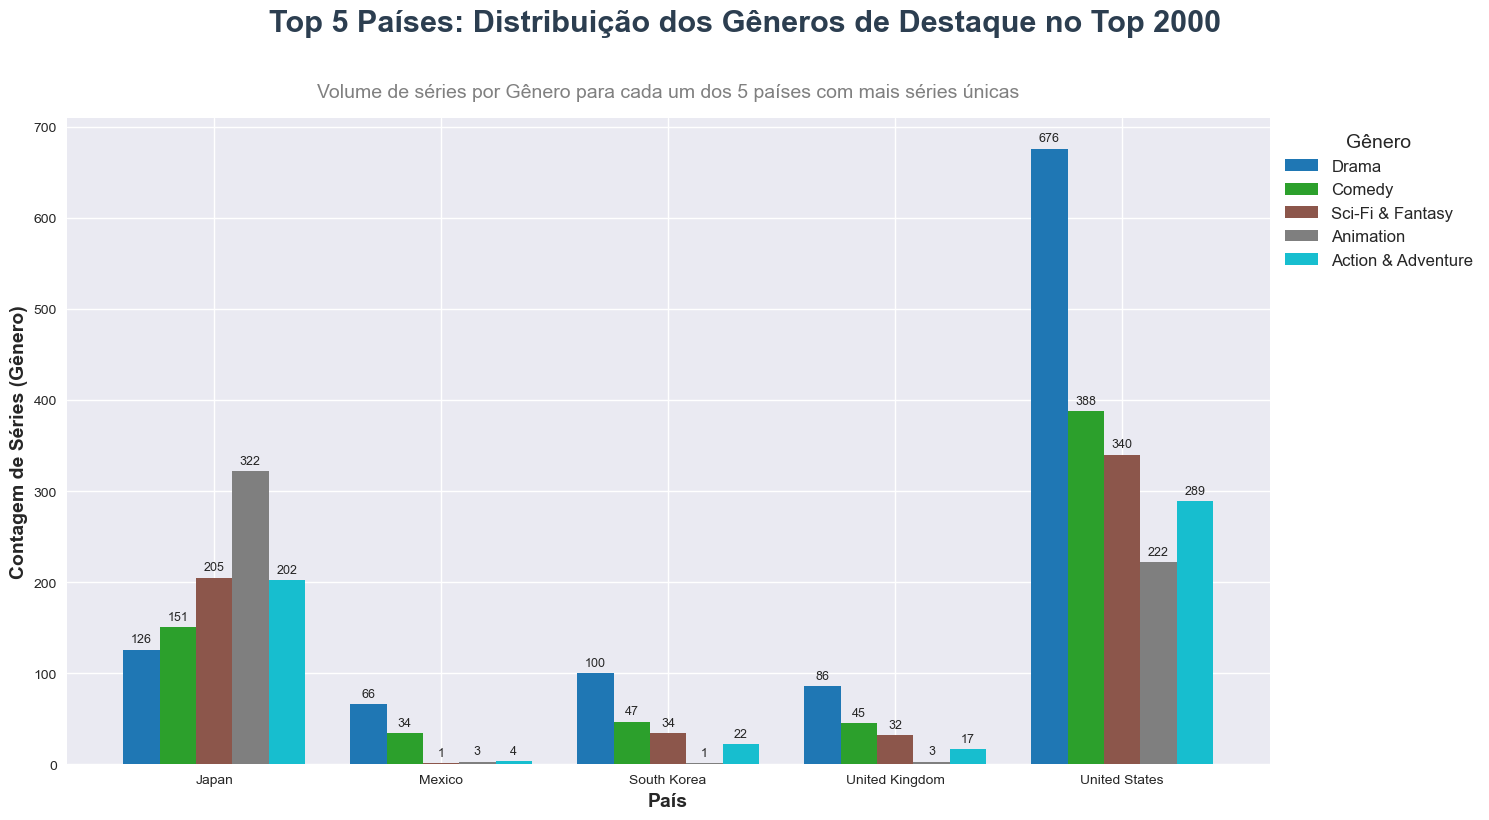


**Visões: Especialização por País e Estratêgia de Conteúdo**

- **Domínio Americana:** Os EUA dominam Drama, Comedy, Sci-Fi & Fantasy e Action & Adventure.  Só o Japão vence os EUA em animação.
- **Estratégia de Nicho (Japão e Coreia):**
    - O **Japão** é o especialista em **Animation** (322 séries), confirmando a dominância dos Animes no Top 2000.
    - A **Coreia do Sul** foca primariamente em **Drama** (100 séries), sendo o maior produtor de K-dramas únicos.
- **Conclusão de Mercado:** Para competir com a amplitude de Hollywood, o sucesso no Top 2000 pode ser alcançado por meio da **especialização** em um único gênero de excelência (Japão/Animation, Coreia/Drama).


In [23]:
# 13: Gráfico País Vs Gênero De Destaque

# Isolar apenas as séries de países únicos 
df_unicos = df[df['país'].apply(lambda x: ',' not in str(x))].copy()

# Selecionar os TOP 5 Países em volume
top_5_paises = df_unicos['país'].value_counts().head(5).index.tolist()

# Filtramos o DataFrame para conter apenas as séries desses 5 países
df_top_5 = df_unicos[df_unicos['país'].isin(top_5_paises)].copy()

# Tratar múltiplos gêneros por série
# Assumimos que a Coluna ‘genero' é uma String Separada por Vírgula e Espaço (', ')
if df_top_5['gêneros'].dtype == 'object':
    df_top_5['generos_split'] = df_top_5['gêneros'].astype(str).str.split(', ')

# Explode a lista de gêneros para que cada série/gênero ocupe uma linha
df_exploded = df_top_5.explode('generos_split')

# Criar a Tabela Dinâmica (País vs Gênero)
# Conta a frequência de cada Gênero para cada País
genero_pais_pivot = df_exploded.groupby(['país', 'generos_split']).size().reset_index(name='Contagem')

# Transforma em tabela cruzada
genero_pais_pivot = genero_pais_pivot.pivot(index='país', columns='generos_split', values='Contagem').fillna(0)

# Filtrar Gêneros para manter o gráfico legível (TOP 5 Gêneros no geral)
# Pega os 5 gêneros mais frequentes no Top 5 de países
top_5_generos_gerais = genero_pais_pivot.sum(axis=0).nlargest(5).index.tolist()
df_plot = genero_pais_pivot[top_5_generos_gerais]

# Gráfico de Barras Agrupadas
# ax = df_plot.plot(kind='bar', figsize=(15, 8), width=0.8)
ax = df_plot.plot(kind='bar', figsize=(15, 8), width=0.8, colormap='tab10')

# Título e Rótulos
plt.suptitle('Top 5 Países: Distribuição dos Gêneros de Destaque no Top 2000',
             fontsize=22, fontweight='bold', y=1.02, color='#2c3e50')
ax.set_title('Volume de séries por Gênero para cada um dos 5 países com mais séries únicas',
             fontsize=14, color='gray', pad=15)
ax.set_xlabel('País', fontsize=14, fontweight='bold')
ax.set_ylabel('Contagem de Séries (Gênero)', fontsize=14, fontweight='bold')

# Rotação para os países
plt.xticks(rotation=0)

# Adicionando a Legenda
ax.legend(title='Gênero', bbox_to_anchor=(1.0, 1.0), loc='upper left', fontsize=12, title_fontsize=14)

# Adicionando os valores em cima de cada barra (data labels)
for container in ax.containers:
    # Filtra e adiciona rótulo apenas para barras que não são zero (para evitar poluição)
    labels = [f'{int(v)}' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3, fontsize=9)

plt.tight_layout()
plt.show()

# Visão Estratégica
display(Markdown("""
**Visões: Especialização por País e Estratégia de Conteúdo**

- **Domínio Americana:** Os EUA dominam Drama, Comedy, Sci-Fi & Fantasy e Action & Adventure.  Só o Japão vence os EUA em animação.
- **Estratégia de Nicho (Japão e Coreia):**
    - O **Japão** é o especialista em **Animation** (322 séries), confirmando a dominância dos Animes no Top 2000.
    - A **Coreia do Sul** foca primariamente em **Drama** (100 séries), sendo o maior produtor de K-dramas únicos.
- **Conclusão de Mercado:** Para competir com a amplitude de Hollywood, o sucesso no Top 2000 pode ser alcançado por meio da **especialização** em um único gênero de excelência (Japão/Animation, Coreia/Drama).
"""))

In [14]:
# 14: Top 10 Joias Escondidas Do Top 2000 (alta nota + baixa popularidade)

# Filtro: nota ≥ 8.4 (top-tier) + popularidade baixa (parte inferior 10% do dataset)
nota_alta = df['nota_média'] >= 8.4
popularidade_baixa = df['popularidade'] <= df['popularidade'].quantile(0.10)
display(Markdown("## Top 10 Joias Escondidas Do Top 2000 (Oportunidade de Mercado)"))
joias_escondidas = df[nota_alta & popularidade_baixa].copy()
joias_escondidas = joias_escondidas.sort_values('nota_média', ascending=False)

# Tabela 
display_cols = ['título', 'nota_média', 'total_votos', 'popularidade', 'ano_estreia', 'país', 'gêneros']
display(joias_escondidas[display_cols].head(17).style\
    .format({'nota_média': '{:.3f}', 'popularidade': '{:.1f}', 'total_votos': '{:,}'})\
    .bar(subset=['nota_média'], color='#27ae60')\
    .bar(subset=['popularidade'], color='#c0392b')\
    .set_properties(**{'font-weight': 'bold'}, subset=['título']))

# Visões Gerais
texto = f"""
**Joias Escondidas - Séries Que Merecem Ser Descobertas**

* **{len(joias_escondidas)}** séries com nota ≥ 8.4 estão no fundo do ranking de popularidade
* **Corte de Popularidade:** Todas as séries estão abaixo do **{df['popularidade'].quantile(0.10):.1f}** (Top 10% menos populares)
* Média de popularidade dessas séries: {joias_escondidas['popularidade'].mean():.1f}
* Muitos são animes japoneses, K-dramas ou produções europeias/independentes (Confirmando o insight da Célula 13)
* **Prova definitiva:** Popularidade ≠ Qualidade

**Ação Estratégica:** Essas são as séries que as empresas de streaming deveriam estar empurrando no algoritmo para aumentar o valor agregado pelo assinante!
"""

display(Markdown(texto))

## Top 10 Joias Escondidas Do Top 2000 (Oportunidade de Mercado)

,título,nota_média,total_votos,popularidade,ano_estreia,país,gêneros
33,I Am Not an Animal,8.600,785,1.7,2004,United Kingdom,"Animation, Comedy, Sci-Fi & Fantasy"
62,Blue Planet II,8.600,306,2.6,2017,United Kingdom,"Documentary, Family"
64,Villainous,8.600,302,1.9,2017,Mexico,Animation
44,Desafío Champions Sendokai,8.597,231,1.7,2013,Spain,"Animation, Comedy, Action & Adventure, Family"
66,I'm in the Band,8.572,270,2.7,2009,United States,Comedy
119,Our Planet,8.512,414,2.8,2019,United Kingdom,"Documentary, Family"
127,BTS In the SOOP,8.504,405,1.6,2020,South Korea,Reality
107,Les Contes de la rue Broca,8.500,278,1.6,1996,France,"Animation, Comedy, Kids"
78,Shadow Hunter,8.500,922,0.8,2005,Canada,"Sci-Fi & Fantasy, Drama"
187,La Familia del Barrio,8.442,491,2.0,2013,Mexico,Comedy



**Joias Escondidas - Séries Que Merecem Ser Descobertas**

* **17** séries com nota ≥ 8.4 estão no fundo do ranking de popularidade
* **Corte de Popularidade:** Todas as séries estão abaixo do **2.9** (Top 10% menos populares)
* Média de popularidade dessas séries: 2.1
* Muitos são animes japoneses, K-dramas ou produções europeias/independentes (Confirmando o insight da Célula 13)
* **Prova definitiva:** Popularidade ≠ Qualidade

**Ação Estratégica:** Essas são as séries que as empresas de streaming deveriam estar empurrando no algoritmo para aumentar o valor agregado pelo assinante!


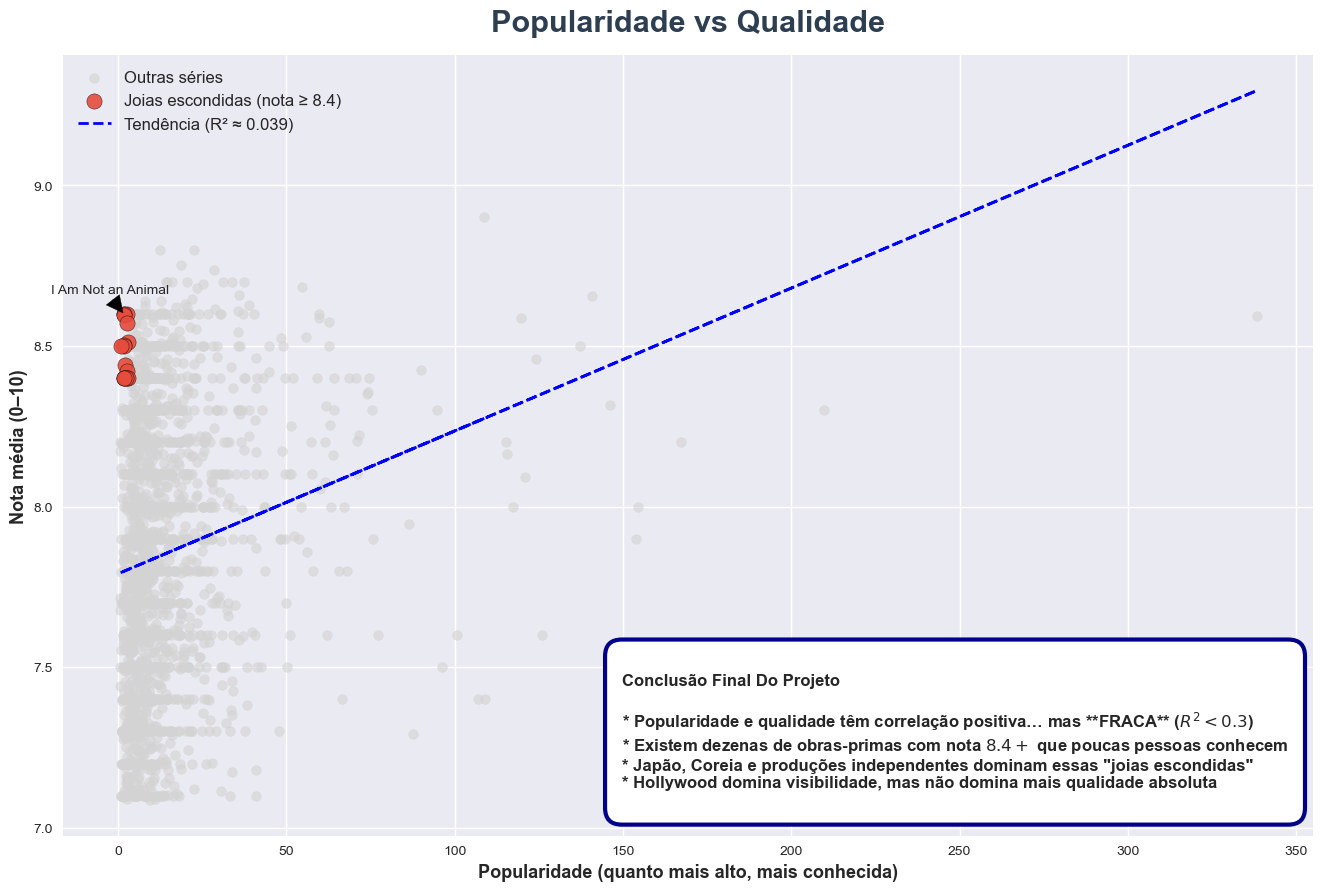


Conclusão Final Do Projeto

* Popularidade e qualidade têm correlação positiva… mas **FRACA** ($R^2 < 0.3$)
* Existem dezenas de obras-primas com nota $8.4+$ que poucas pessoas conhecem
* Japão, Coreia e produções independentes dominam essas "joias escondidas"
* Hollywood domina visibilidade, mas não domina mais qualidade absoluta


In [22]:
# 15: Popularidade vs Nota média

# Visão final movida para o topo para corrigir erro
texto_final = f"""
Conclusão Final Do Projeto

* Popularidade e qualidade têm correlação positiva… mas **FRACA** ($R^2 < 0.3$)
* Existem dezenas de obras-primas com nota $8.4+$ que poucas pessoas conhecem
* Japão, Coreia e produções independentes dominam essas "joias escondidas"
* Hollywood domina visibilidade, mas não domina mais qualidade absoluta
"""

plt.figure(figsize=(14, 9))

# Scatter geral
plt.scatter(df['popularidade'], df['nota_média'], 
            c='lightgray', alpha=0.6, s=50, label='Outras séries')

# Destaque das joias escondidas
plt.scatter(joias_escondidas['popularidade'], joias_escondidas['nota_média'],
            c='#e74c3c', alpha=0.9, s=120, edgecolors='black', label='Joias escondidas (nota ≥ 8.4)')

# Linha de tendência
z = np.polyfit(df['popularidade'], df['nota_média'], 1)
p = np.poly1d(z)
plt.plot(df['popularidade'], p(df['popularidade']), color='blue', linewidth=2, linestyle='--', 
         label=f'Tendência (R² ≈ {np.corrcoef(df["popularidade"], df["nota_média"])[0,1]**2:.3f})')

plt.title('Popularidade vs Qualidade', 
          fontsize=22, fontweight='bold', y=1.02, color='#2c3e50')
plt.xlabel('Popularidade (quanto mais alto, mais conhecida)', fontsize=13, fontweight='bold')
plt.ylabel('Nota média (0–10)', fontsize=13, fontweight='bold')
plt.legend(fontsize=12)

plt.text(0.447, 0.23, texto_final, transform=plt.gca().transAxes,
         fontsize=12, fontweight='bold', verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='darkblue', boxstyle='round,pad=1', lw=3))

# Adicionar rótulo na série de maior nota (o ponto mais alto)
melhor_joia = joias_escondidas.iloc[0] # Pega a série de maior nota
plt.annotate(melhor_joia['título'], # O título da série
             (melhor_joia['popularidade'], melhor_joia['nota_média']),
             textcoords="offset points", xytext=(-10, 15), ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

# Visão final

display(Markdown(texto_final))